# **Task 2**

---

## **Predictive modeling of customer bookings**

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### **Exploratory data analysis**

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.shape

(50000, 14)

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No missing values

## **Create new features**
Because we want to know more about the customer's behavior to have a trip on holiday (weekend). Let's make a feature called **weekend**. if the flight day is Saturday or Sunday we give is_weekend value = 1, for another flight day we give it 0

In [10]:
weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        weekend.append(1)
    else:
        weekend.append(0)

df['weekend'] = weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


Average Number of Passengers per Sales Channel and Trip Type


In [11]:
df['avg_passengers'] = df.groupby(['sales_channel', 'trip_type'])['num_passengers'].transform('mean')

Conversion Rate by Sales Channel

In [12]:
conversion_rates = df.groupby('sales_channel')['booking_complete'].mean()
df['conversion_rate_by_sales_channel'] = df['sales_channel'].map(conversion_rates)

Conversion Rate by Trip Type

In [13]:
conversion_rates = df.groupby('trip_type')['booking_complete'].mean()
df['conversion_rate_by_trip_type'] = df['trip_type'].map(conversion_rates)

Categorical Length of Stay

In [14]:
df['length_of_stay_category'] = pd.qcut(df['length_of_stay'], q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

Time of Day Categories

In [15]:
df['time_of_day'] = pd.cut(df['flight_hour'], bins=[0, 6, 12, 18, 24], labels=['Early Morning', 'Morning', 'Afternoon', 'Night'])

Booking Origin Type

In [16]:
df['booking_origin_type'] = df['booking_origin'].str.lower()

Previous Selections (Extra Baggage, Preferred Seat, In-flight Meals)

In [17]:
df['previous_extra_baggage_selection'] = df.groupby(['sales_channel', 'trip_type'])['wants_extra_baggage'].shift()
df['previous_preferred_seat_selection'] = df.groupby(['sales_channel', 'trip_type'])['wants_preferred_seat'].shift()
df['previous_in_flight_meal_selection'] = df.groupby(['sales_channel', 'trip_type'])['wants_in_flight_meals'].shift()

Flight Duration Categories

In [18]:
df['flight_duration_category'] = pd.qcut(df['flight_duration'], q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

## **Data analysis**

Let's check how many passenger that have a flight in the weekend



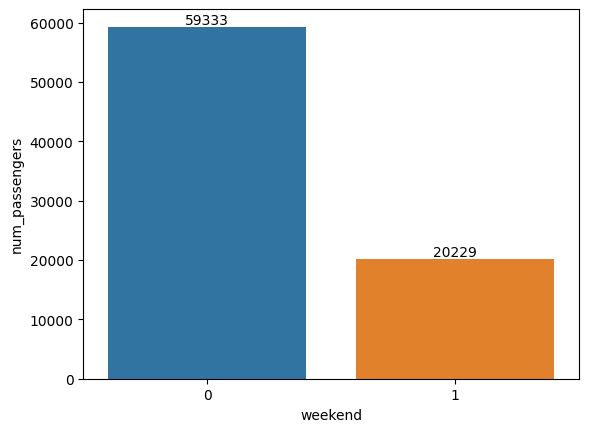

In [19]:
weekend = df.groupby('weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x= 'weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

Sales per channel : 

In [20]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


In [21]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


Booking origin

Text(0, 0.5, 'Number of bookings')

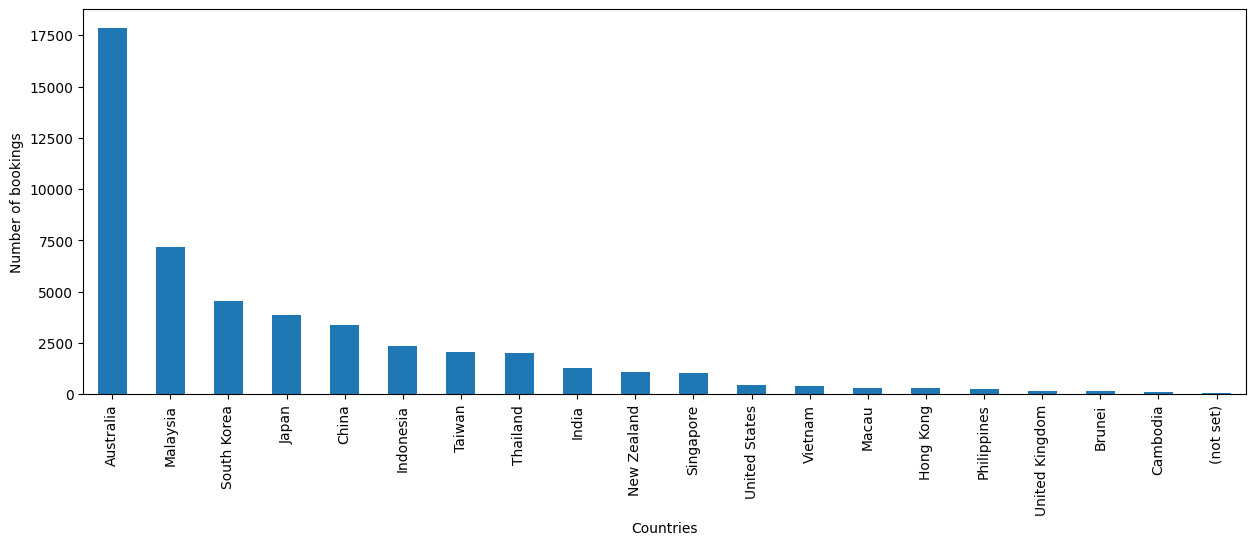

In [22]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

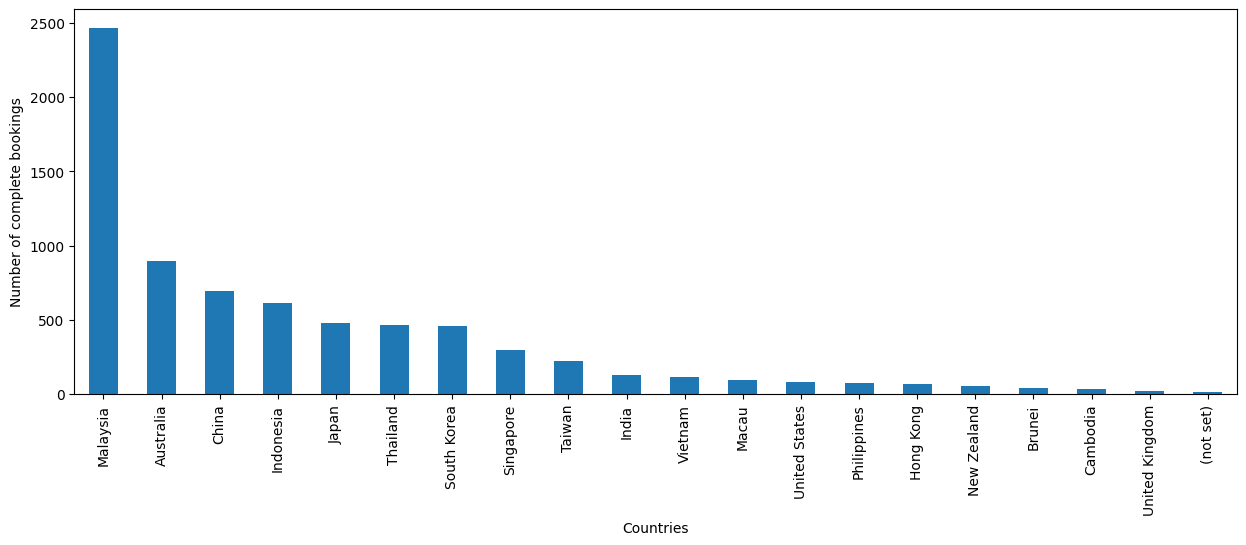

In [23]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [24]:
route = df[df['weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [25]:
route

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306
...,...,...
588,OOLUTP,1
378,ICNTGG,1
381,IKAMFM,1
583,OOLSUB,1


The graph showing from which country travelers have made the most booking requests.

Text(0, 0.5, 'Number of bookings')

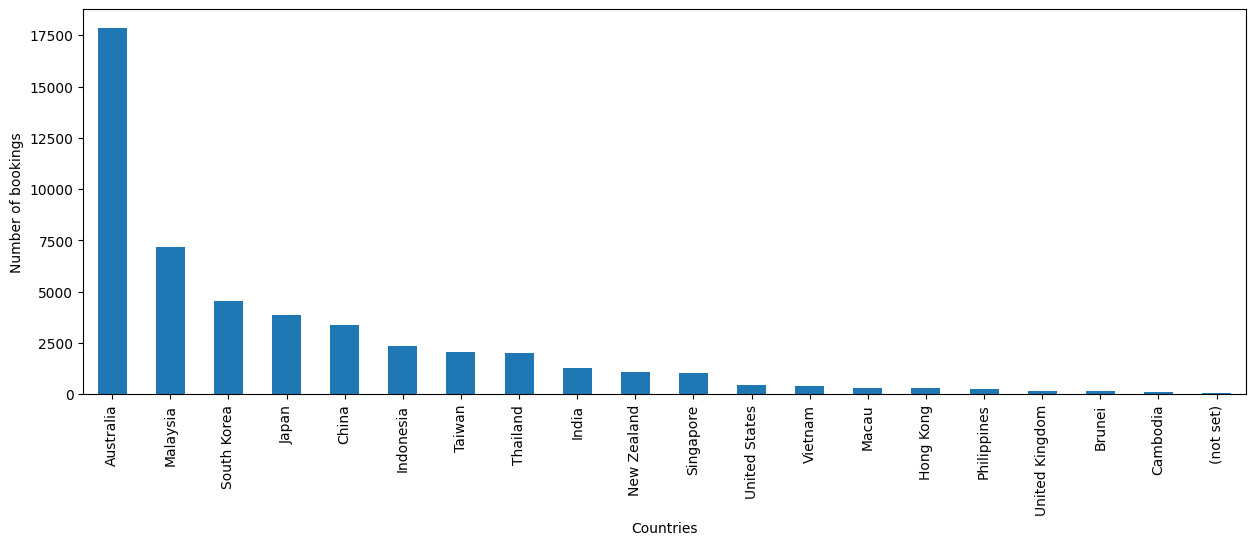

In [26]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

The graph showing travellers from which country had their booking complete.

Text(0, 0.5, 'Number of complete bookings')

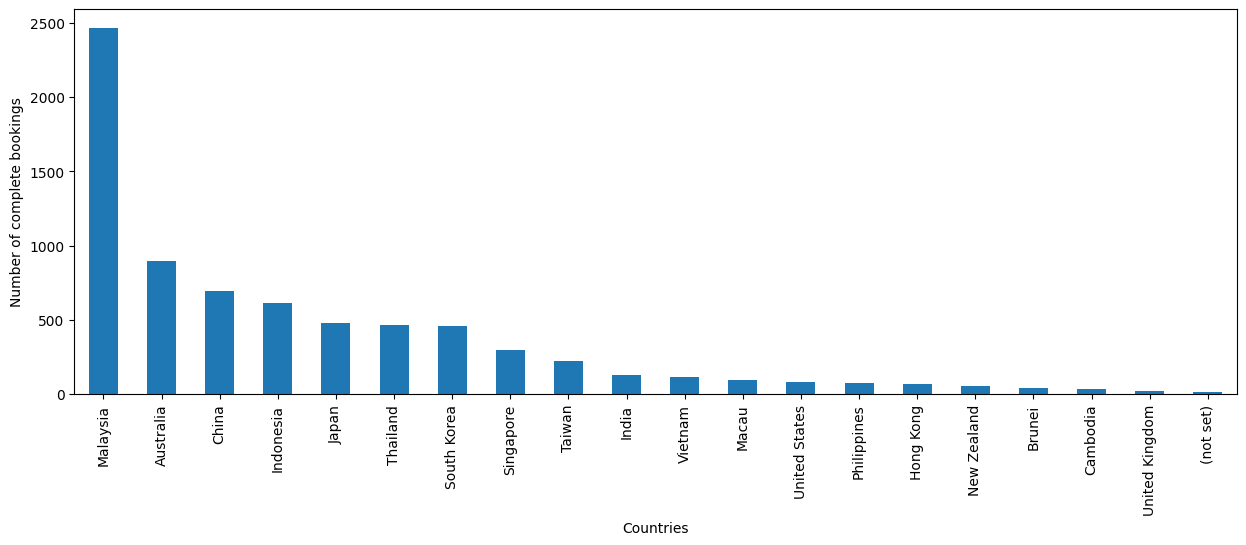

In [27]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

## **Make a machine learning Model**
### **Data Preparation**

In [28]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [29]:
#store the label for supervised learning
label = df['booking_complete']

In [30]:
from sklearn.preprocessing import OneHotEncoder

#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df = df.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df = df.join(encoder_df)

In [31]:
numeric_columns = df.select_dtypes(include='number').columns

# Filter out columns with values 0 and 1
filtered_columns = [col for col in numeric_columns if not all(df[col].isin([0, 1]))]

# Select only the numeric columnas excluding 0 and 1 columns
numeric_df = df[filtered_columns]

# Display the numeric columns
numeric_df


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,avg_passengers,conversion_rate_by_sales_channel,conversion_rate_by_trip_type,previous_extra_baggage_selection,previous_preferred_seat_selection,previous_in_flight_meal_selection
0,2,262,19,7,6,5.52,1.592287,0.15477,0.150575,NaN,NaN,NaN
1,1,112,20,3,6,5.52,1.592287,0.15477,0.150575,1.0,0.0,0.0
2,2,243,22,17,3,5.52,1.592287,0.15477,0.150575,0.0,0.0,0.0
3,1,96,31,4,6,5.52,1.592287,0.15477,0.150575,1.0,1.0,0.0
4,2,68,22,15,3,5.52,1.592287,0.15477,0.150575,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,5.62,1.592287,0.15477,0.150575,0.0,0.0,0.0
49996,1,111,6,4,7,5.62,1.592287,0.15477,0.150575,1.0,0.0,1.0
49997,1,24,6,22,6,5.62,1.592287,0.15477,0.150575,0.0,0.0,0.0
49998,1,15,6,11,1,5.62,1.592287,0.15477,0.150575,0.0,0.0,1.0


In [32]:
df1 = numeric_df

In [33]:
# Dropping columns from df1
df2 = df.drop(columns=df1.columns)

In [34]:
df = df.drop('booking_complete', axis=1)

In [35]:
df = df2

In [36]:
df

,sales_channel,trip_type,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete,weekend,length_of_stay_category,time_of_day,booking_origin_type,flight_duration_category,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,Internet,RoundTrip,AKLDEL,New Zealand,1,0,0,0,1,Long,Morning,new zealand,Short,1.0,0.0,0.0,0.0,1.0
1,Internet,RoundTrip,AKLDEL,New Zealand,0,0,0,0,1,Long,Early Morning,new zealand,Short,1.0,0.0,0.0,0.0,1.0
2,Internet,RoundTrip,AKLDEL,India,1,1,0,0,0,Long,Afternoon,india,Short,1.0,0.0,0.0,0.0,1.0
3,Internet,RoundTrip,AKLDEL,New Zealand,0,0,1,0,1,Very Long,Early Morning,new zealand,Short,1.0,0.0,0.0,0.0,1.0
4,Internet,RoundTrip,AKLDEL,India,1,0,1,0,0,Long,Afternoon,india,Short,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Internet,RoundTrip,PERPNH,Australia,1,0,1,0,1,Medium,Morning,australia,Short,1.0,0.0,0.0,0.0,1.0
49996,Internet,RoundTrip,PERPNH,Australia,0,0,0,0,1,Medium,Early Morning,australia,Short,1.0,0.0,0.0,0.0,1.0
49997,Internet,RoundTrip,PERPNH,Australia,0,0,1,0,1,Medium,Night,australia,Short,1.0,0.0,0.0,0.0,1.0
49998,Internet,RoundTrip,PERPNH,Australia,1,0,1,0,0,Medium,Morning,australia,Short,1.0,0.0,0.0,0.0,1.0


In [37]:
#drop categorical columns now
df.drop(['sales_channel', 'trip_type','booking_origin', 'route','length_of_stay_category','time_of_day','booking_origin_type','flight_duration_category'], axis=1, inplace = True)

In [38]:
df = df.drop('booking_complete', axis=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wants_extra_baggage    50000 non-null  int64  
 1   wants_preferred_seat   50000 non-null  int64  
 2   wants_in_flight_meals  50000 non-null  int64  
 3   weekend                50000 non-null  int64  
 4   Internet               50000 non-null  float64
 5   Mobile                 50000 non-null  float64
 6   RoundTRip              50000 non-null  float64
 7   OneWayTrip             50000 non-null  float64
 8   CircleTrip             50000 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.4 MB


In [40]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df)

In [41]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [42]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [43]:
scaled_df

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,weekend,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.703747,-0.649919,-0.863497,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-1.420965,-0.649919,-0.863497,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.703747,1.538654,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-1.420965,-0.649919,1.158082,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.703747,-0.649919,1.158082,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...
49995,0.703747,-0.649919,1.158082,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-1.420965,-0.649919,-0.863497,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-1.420965,-0.649919,1.158082,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,0.703747,-0.649919,1.158082,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


### **Correlation matrix**

<Axes: >

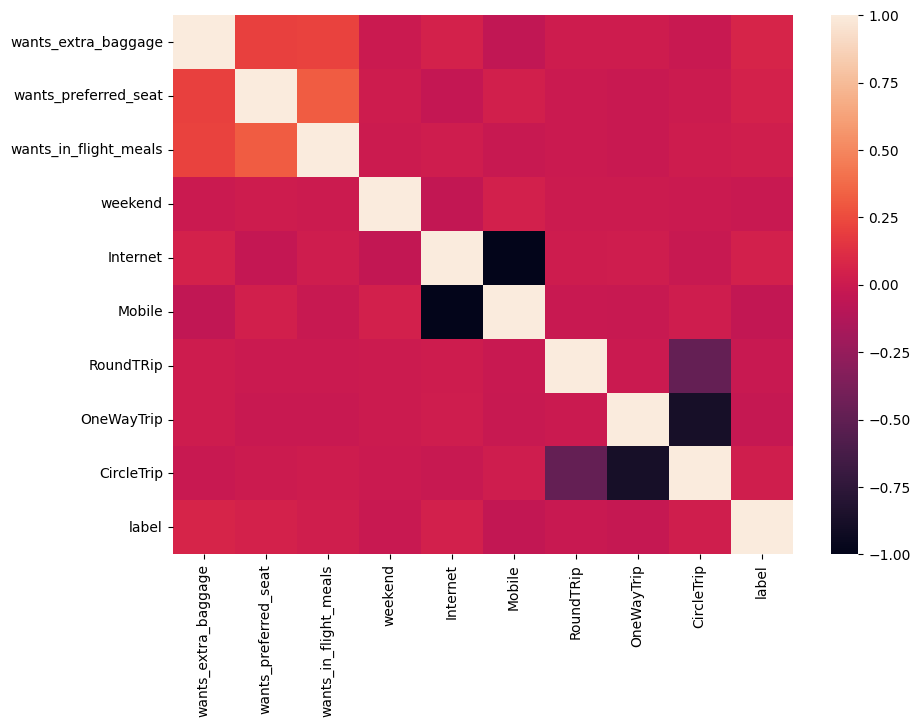

In [44]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

### **Train | Test Split**

In [45]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [47]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

### **Random Forest Classifier**

In [48]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

#### **Checking Training accuracy**

In [49]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 1.0 and 0.0 respectively


0.8501

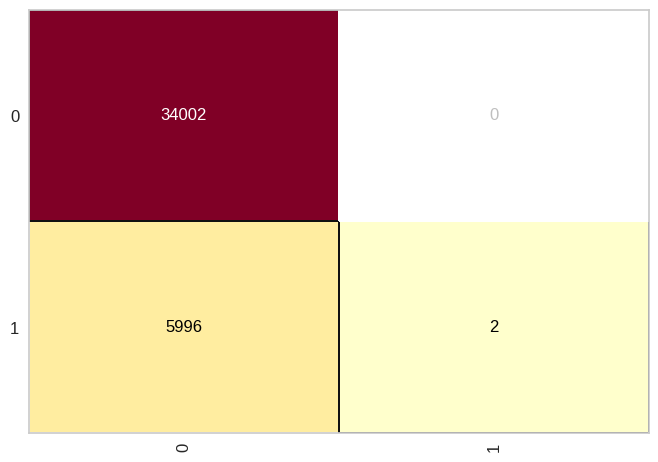

In [50]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

### **Checking Testing accuracy**

In [51]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.0 and 0.0 respectively


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.852

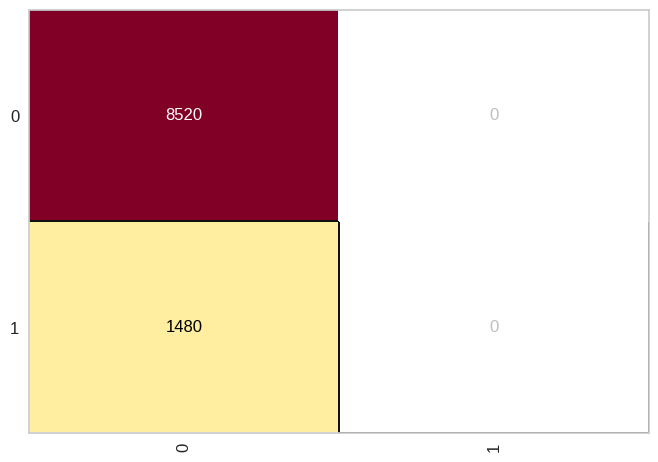

In [52]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

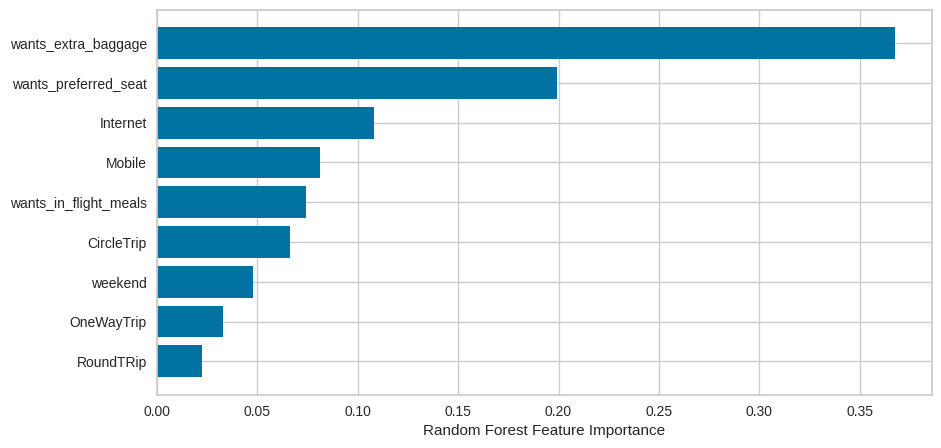

In [53]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind getting low F1 score is imbalanced dataset. We have higher entries that are classified 0 than 1. We could reduce the number of entries that are classified 0 to be equal around the number of entries that are classified as 1.

### **Balancing the dataset**

In [54]:
scaled_df.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [55]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [56]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [57]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [58]:
scaled_df_new

,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,weekend,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.703747,1.538654,1.158082,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,0.703747,-0.649919,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.703747,1.538654,-0.863497,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-1.420965,-0.649919,-0.863497,1.744518,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.703747,-0.649919,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...
15473,-1.420965,-0.649919,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15474,0.703747,-0.649919,-0.863497,-0.573224,-2.810688,2.810688,-0.048222,-0.08832,0.100808,0
15475,0.703747,-0.649919,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15476,0.703747,-0.649919,-0.863497,-0.573224,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1


In [59]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [60]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=100,max_depth =50 , min_samples_split=5,random_state=0)

In [61]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.55, 0.54, 0.56, 0.53 and 0.55 respectively


0.5487726098191215

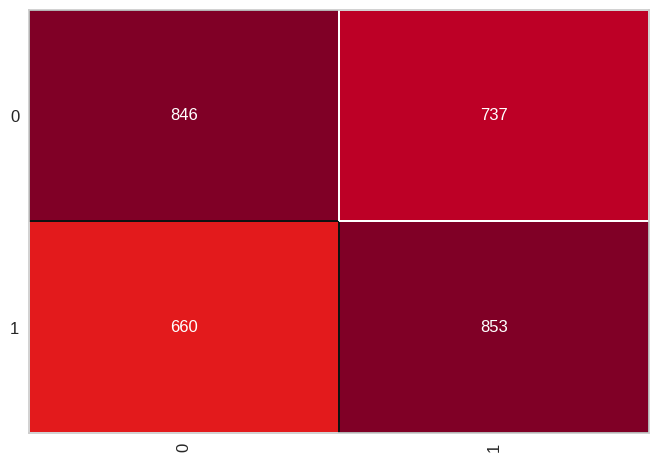

In [62]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

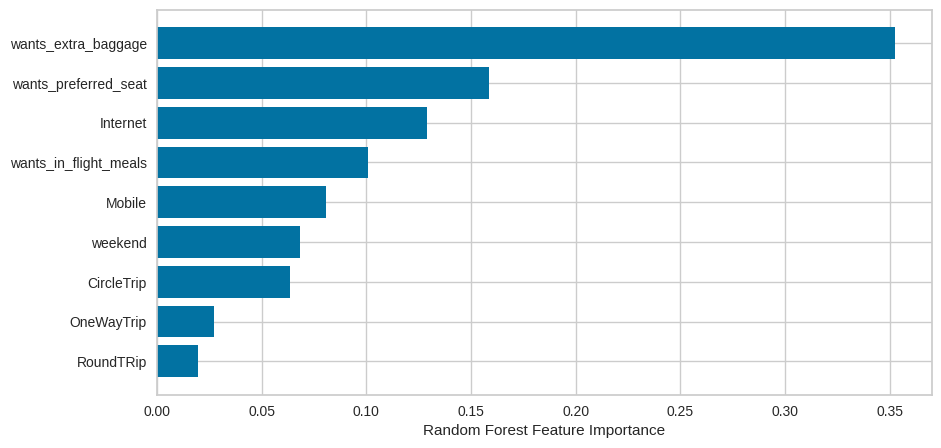

In [63]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")